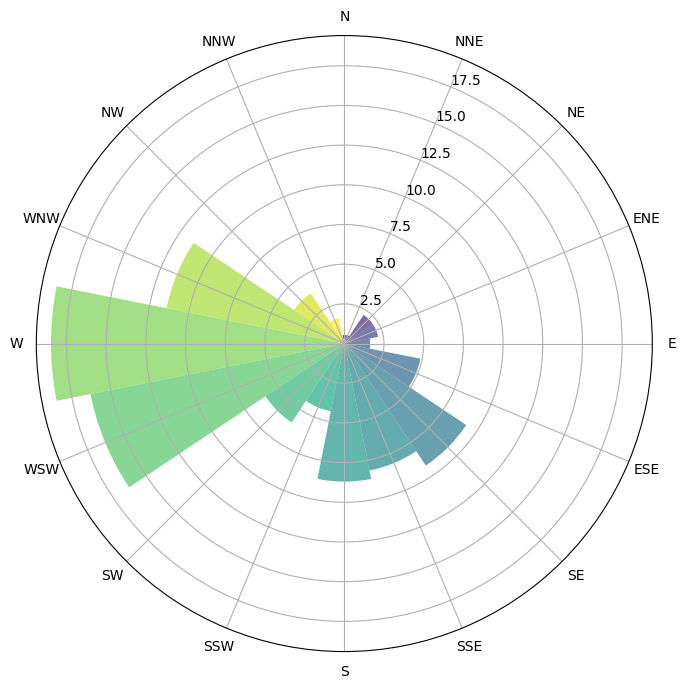

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Funcion para designar las categorias
def assign_direction(direccion):
    bins = np.arange(0, 360, 22.5)
    names = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW', 'N']
    idx = np.digitize(direccion, bins)
    return names[idx]

df = pd.read_csv('C:/Users/Eduvier/Desktop/Direccion.csv')

# Asignar la dirección agrupada
df['Direccion Agrupada'] = df['Direccion de viento'].apply(assign_direction)

# Contar la frecuencia de cada categoría
counts = df['Direccion Agrupada'].value_counts()

# Convertir las frecuencias en porcentajes
counts = counts / counts.sum() * 100

# Ordenar las categorías en el orden correcto
names = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
counts = counts.reindex(names)

# Crear una gráfica de la rosa de los vientos
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Convertir las direcciones en radianes
radians = np.linspace(0, 2*np.pi, len(names), endpoint=False)

# Crear una lista de colores
colors = plt.cm.viridis(np.linspace(0, 1, len(names)))
ax.bar(radians, counts, width=2*np.pi/16, bottom=0, color=colors, alpha=0.7)

# Ajustar las etiquetas del gráfico
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 360/16), labels=names)

plt.show()


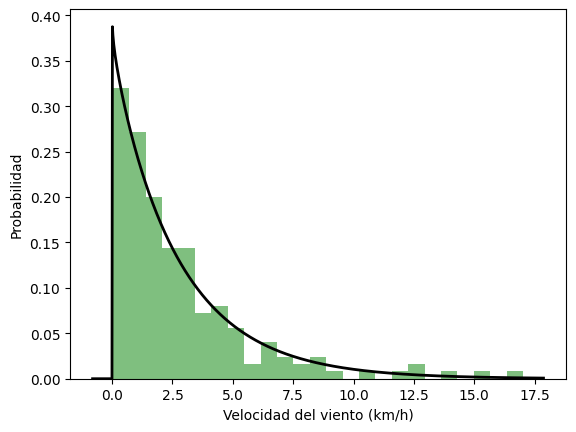

In [45]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Eduvier/Desktop/Velocidad.csv')

velocidades = df['Velocidad del viento (km/h)']

#Ajuste de parametros para distintas funciones
parametros1 = stats.weibull_min.fit(velocidades, floc=0)

#PRIMER METODO: distribucion de Weibull

#Creacion del eje velocidad y ajuste de formato
plt.hist(velocidades, bins=25, density=True, alpha=0.5, color='g')

#Delimitacion del grafico
xmin, xmax = plt.xlim()

#Creacion de un array que contenga los datos
x = np.linspace(xmin, xmax, 1000)
p = stats.weibull_min.pdf(x, parametros1[0], parametros1[1], parametros1[2])
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('Velocidad del viento (km/h)')  # Reemplaza 'unidades' con las unidades de medida correctas
plt.ylabel('Probabilidad')

plt.show()

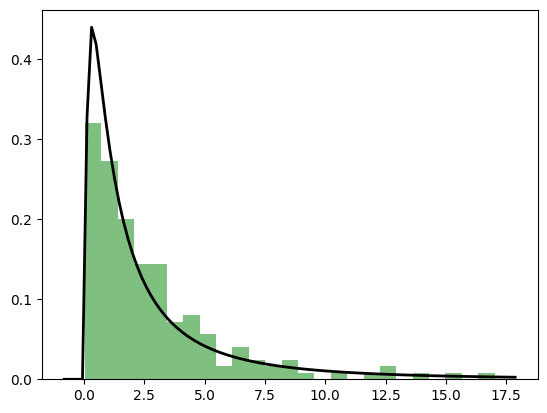

In [43]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Eduvier/Desktop/Velocidad.csv')

velocidades = df['Velocidad del viento (km/h)']

#Ajuste de parametros para distintas funciones
parametros2 = stats.lognorm.fit(velocidades, floc=0)

#SEGUNDO METODO: distribucion de logaritmica

#Creacion del eje velocidad y ajuste de formato
plt.hist(velocidades, bins=25, density=True, alpha=0.5, color='g')

#Delimitacion del grafico
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.lognorm.pdf(x, parametros2[0], parametros2[1], parametros2[2])
plt.plot(x, p, 'k', linewidth=2)
plt.show()


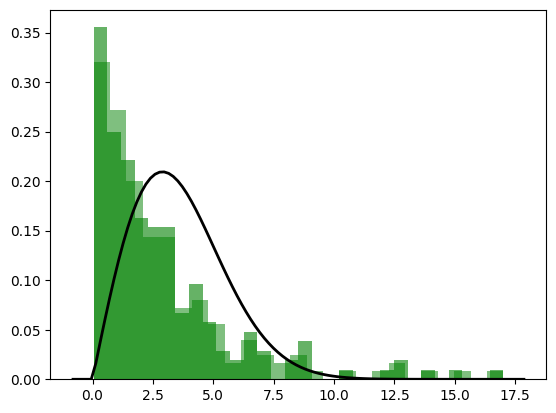

In [44]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Eduvier/Desktop/Velocidad.csv')

velocidades = df['Velocidad del viento (km/h)']

#Ajuste de parametros para distintas funciones

parametros3 = stats.rayleigh.fit(velocidades, floc=0)

#TERCER METODO: distribucion de Rayleigh

#Creacion del eje velocidad y ajuste de formato
plt.hist(velocidades, bins=25, density=True, alpha=0.5, color='g')

#Delimitacion del grafico
xmin, xmax = plt.xlim()

plt.hist(velocidades, bins=30, density=True, alpha=0.6, color='g')
x = np.linspace(xmin, xmax, 100)
p = stats.rayleigh.pdf(x, parametros3[0], parametros3[1])
plt.plot(x, p, 'k', linewidth=2)
plt.show()


C:\Users\Eduvier\AppData\Local\Temp\ipykernel_2356\3268161205.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('C:/Users/Eduvier/Desktop/VelocidadProm.csv', parse_dates=['Fecha'])


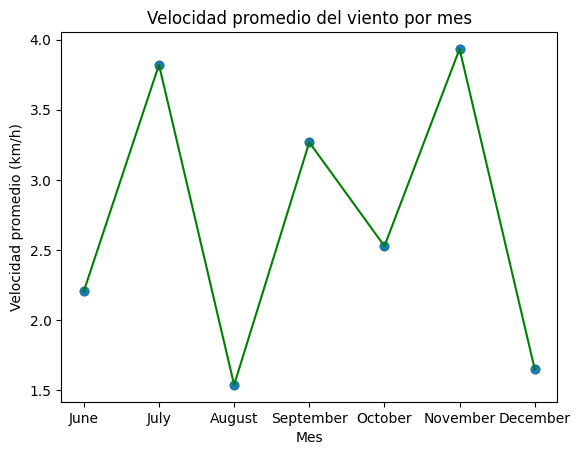

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

df = pd.read_csv('C:/Users/Eduvier/Desktop/VelocidadProm.csv', parse_dates=['Fecha'])

# Convierte la columna 'Fecha' al tipo de dato 'datetime'
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')

# Agrupa los datos por mes y calcula la velocidad promedio de cada mes
df['Mes'] = df['Fecha'].dt.month
df_mes = df.groupby('Mes')['Velocidad del viento (km/h)'].mean()

# Cambia los números de los meses a los nombres de los meses
meses = [calendar.month_name[int(i)] for i in df_mes.index]

plt.scatter(meses, df_mes, color='green')
plt.plot(meses, df_mes, color='green')

plt.scatter(meses, df_mes)
plt.xlabel('Mes')
plt.ylabel('Velocidad promedio (km/h)')
plt.title('Velocidad promedio del viento por mes')
plt.show()

C:\Users\Eduvier\AppData\Local\Temp\ipykernel_18380\1967979218.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('C:/Users/Eduvier/Desktop/Temperatura.csv', parse_dates=['Fecha'])


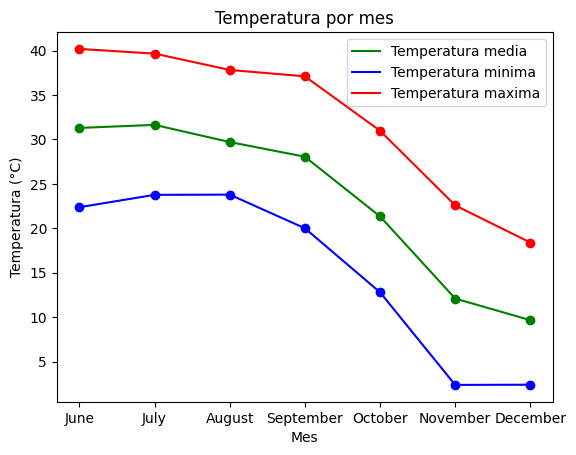

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

df = pd.read_csv('C:/Users/Eduvier/Desktop/Temperatura.csv', parse_dates=['Fecha'])

# Convierte la columna 'Fecha' al tipo de dato 'datetime'
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')

# Agrupa los datos por mes y calcula la velocidad promedio de cada mes
df['Mes'] = df['Fecha'].dt.month
df_mes_temp_media = df.groupby('Mes')['Temperatura promedio'].mean()
df_mes_temp_min = df.groupby('Mes')['Temperatura minima'].mean()
df_mes_temp_max = df.groupby('Mes')['Temperatura maxima'].mean()

# Cambia los números de los meses a los nombres de los meses
meses = [calendar.month_name[int(i)] for i in df_mes_temp_media.index]

# Crea el gráfico de puntos y líneas para la temperatura media
plt.scatter(meses, df_mes_temp_media, color='green')
plt.plot(meses, df_mes_temp_media, color='green', label='Temperatura media')

# Crea el gráfico de puntos y líneas para la temperatura minima
plt.scatter(meses, df_mes_temp_min, color='blue')
plt.plot(meses, df_mes_temp_min, color='blue', label='Temperatura minima')

# Crea el gráfico de puntos y líneas para la temperatura maxima
plt.scatter(meses, df_mes_temp_max, color='red')
plt.plot(meses, df_mes_temp_max, color='red', label='Temperatura maxima')

plt.xlabel('Mes')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura por mes')
plt.legend()
plt.show()


C:\Users\Eduvier\AppData\Local\Temp\ipykernel_18380\805972808.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('C:/Users/Eduvier/Desktop/Humedad.csv', parse_dates=['Fecha'])


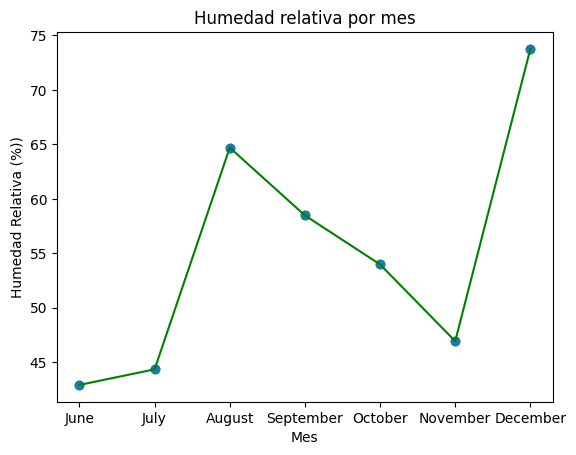

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

df = pd.read_csv('C:/Users/Eduvier/Desktop/Humedad.csv', parse_dates=['Fecha'])

# Convierte la columna 'Fecha' al tipo de dato 'datetime'
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')

# Agrupa los datos por mes y calcula la velocidad promedio de cada mes
df['Mes'] = df['Fecha'].dt.month
df_mes = df.groupby('Mes')['Humedad relativa (%)'].mean()

# Cambia los números de los meses a los nombres de los meses
meses = [calendar.month_name[int(i)] for i in df_mes.index]

plt.scatter(meses, df_mes, color='green')
plt.plot(meses, df_mes, color='green')

plt.scatter(meses, df_mes)
plt.xlabel('Mes')
plt.ylabel('Humedad Relativa (%))')
plt.title('Humedad relativa por mes')
plt.show()

C:\Users\Eduvier\AppData\Local\Temp\ipykernel_1008\2150916916.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('C:/Users/Eduvier/Desktop/Densidad.csv', parse_dates=['Fecha'])


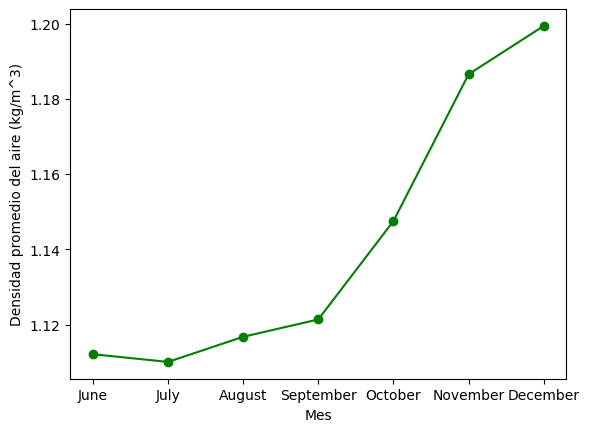

0      1.119994
1      1.103993
2      1.100729
3      1.105093
4      1.109462
         ...   
179    1.214602
180    1.203263
181    1.216324
182    1.215997
183    1.208957
Name: Densidad, Length: 184, dtype: float64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import numpy as np

df = pd.read_csv('C:/Users/Eduvier/Desktop/Densidad.csv', parse_dates=['Fecha'])
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')

# Cálculo de la densidad del aire utilizando el modelo CIPM-2007
P = df['Presion'] * 100  # Convertir la presión de mb a Pa
T = df['Temperatura'] + 273.15  # Convertir la temperatura de Celsius a Kelvin
RH = df['Humedad'] / 100  # Convertir la humedad relativa a una fracción
R = 8.31447215  # Constante de los gases ideales, en J/(mol·K)
M = 28.96546e-3  # Masa molar del aire seco, en kg/mol
H = 6.112 * np.exp((17.62 * df['Temperatura']) / (243.12 + df['Temperatura'])) * df['Humedad'] / 100  # Presión de vapor de agua
Z = 1 - (df['Presion'] * H) / (P * (1 + (1.00062 * df['Humedad'] * df['Temperatura'] / 100)))
df['Densidad'] = P * M / (Z * R * T)  # Densidad del aire, en kg/m^3

# Agregar una columna para el mes
df['Mes'] = df['Fecha'].dt.month

# Calcular la densidad promedio mensual
df_mes = df.groupby('Mes')['Densidad'].mean()

# Convertir el índice numérico a nombres de meses
df_mes.index = [calendar.month_name[int(i)] for i in df_mes.index]

# Crea el gráfico de puntos dispersos
plt.scatter(df_mes.index, df_mes, color='green')
plt.plot(df_mes.index, df_mes, color='green')
plt.xlabel('Mes')
plt.ylabel('Densidad promedio del aire (kg/m^3)')
plt.show()

print(df['Densidad'])


In [7]:
import pandas as pd
import calendar

# Leyendo los datos del CSV
df = pd.read_csv('C:/Users/Eduvier/Desktop/VelocidadProm.csv', parse_dates=['Fecha'])

# Convertir la columna 'Fecha' al formato de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')

# Agregar una columna para el mes
df['Mes'] = df['Fecha'].dt.month

# Calcular la desviación estándar del viento para cada mes
df_std = df.groupby('Mes')['Velocidad del viento (km/h)'].std()

# Calcular el valor medio del viento para cada mes
df_mean = df.groupby('Mes')['Velocidad del viento (km/h)'].mean()

# Calcular la intensidad de la turbulencia
df_it = df_std / df_mean

# Crear una nueva DataFrame con los resultados
df_result = pd.DataFrame({
    'Mes': [calendar.month_name[int(i)] for i in df_it.index],
    'Intensidad de la turbulencia': df_it
})

# Mostrar la DataFrame
print(df_result)


           Mes  Intensidad de la turbulencia
Mes                                         
6         June                      0.524823
7         July                      0.591146
8       August                      0.725639
9    September                      0.945031
10     October                      1.461112
11    November                      1.043576
12    December                      1.320577


C:\Users\Eduvier\AppData\Local\Temp\ipykernel_1008\2429757931.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('C:/Users/Eduvier/Desktop/VelocidadProm.csv', parse_dates=['Fecha'])


C:\Users\Eduvier\AppData\Local\Temp\ipykernel_1008\679234222.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('C:/Users/Eduvier/Desktop/Densidad.csv', parse_dates=['Fecha'])


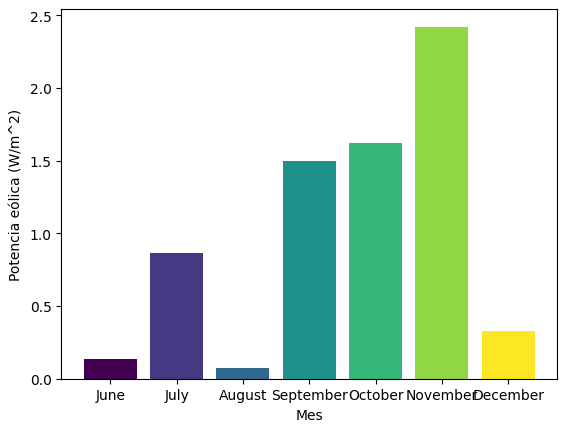

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import numpy as np

df = pd.read_csv('C:/Users/Eduvier/Desktop/Densidad.csv', parse_dates=['Fecha'])
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['Mes'] = df['Fecha'].dt.month

# Cálculo de la densidad del aire utilizando el modelo CIPM-2007
P = df['Presion'] * 100  # Convertir la presión de mb a Pa
T = df['Temperatura'] + 273.15  # Convertir la temperatura de Celsius a Kelvin
RH = df['Humedad'] / 100  # Convertir la humedad relativa a una fracción
R = 8.31447215  # Constante de los gases ideales, en J/(mol·K)
M = 28.96546e-3  # Masa molar del aire seco, en kg/mol
H = 6.112 * np.exp((17.62 * df['Temperatura']) / (243.12 + df['Temperatura'])) * df['Humedad'] / 100  # Presión de vapor de agua
Z = 1 - (df['Presion'] * H) / (P * (1 + (1.00062 * df['Humedad'] * df['Temperatura'] / 100)))
Cp = 16/27

df['Densidad'] = P * M / (Z * R * T)  # Densidad del aire, en kg/m^3

# Calcula la potencia eólica
df['Potencia eólica'] = Cp * df.apply(lambda row: 0.5 * row['Densidad'] * (row['Velocidad del viento (km/h)']*0.277778)**3, axis=1)

# Agrupa los datos por mes y calcula la media de la potencia eólica
df_mes = df.groupby('Mes')['Potencia eólica'].mean()

# Cambia el índice a los nombres de los meses
df_mes.index = [calendar.month_name[int(i)] for i in df_mes.index]

# Crear una lista de colores
colors = plt.cm.viridis(np.linspace(0, 1, len(df_mes)))

# Crea el gráfico de barras
plt.bar(df_mes.index, df_mes.values, color=colors)
plt.xlabel('Mes')
plt.ylabel('Potencia eólica (W/m^2)')
plt.show()
